In [139]:
import pandas_ta
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
from indicadores import BollingerBands


# Prueba para subir esto al GitHub

## Importo los datos

In [121]:
# La ruta debe estar el MAC (no en Synology)
ruta = '/Users/cesar/Desktop/IBT (Python)/SPY.csv'
df = pd.read_csv(ruta) # hacemos la lectura del archivo con pandas


In [122]:
df.head(20).style

,date,close
0,2006-12-29,141.620000
1,2007-01-03,141.370000
2,2007-01-04,141.670000
3,2007-01-05,140.540000
4,2007-01-08,141.190000
5,2007-01-09,141.070000
6,2007-01-10,141.540000
7,2007-01-11,142.160000
8,2007-01-12,143.240000
9,2007-02-23,145.300000


In [123]:
df['date'] = pd.to_datetime(df['date']) #
df=df.set_index('date')

In [124]:
df

,close
date,
2006-12-29,141.62
2007-01-03,141.37
2007-01-04,141.67
2007-01-05,140.54
2007-01-08,141.19
...,...
2022-11-18,396.03
2022-11-21,394.59
2022-11-22,399.90


In [125]:
''' Esta funcion ya la tengo en el archivo indicadores.py
def BollingerBands (array, ventana, factor):
    mm = array.rolling(ventana).mean()
    sd = array.rolling(ventana).std()
    upper = mm+factor*sd
    lower = mm-factor*sd
    return lower, upper
'''

' Esta funcion ya la tengo en el archivo indicadores.py\ndef BollingerBands (array, ventana, factor):\n    mm = array.rolling(ventana).mean()\n    sd = array.rolling(ventana).std()\n    upper = mm+factor*sd\n    lower = mm-factor*sd\n    return lower, upper\n'

,close,lower,upper
date,,,
2006-12-29 00:00:00,141.620000,nan,nan
2007-01-03 00:00:00,141.370000,nan,nan
2007-01-04 00:00:00,141.670000,nan,nan
2007-01-05 00:00:00,140.540000,nan,nan
2007-01-08 00:00:00,141.190000,nan,nan
2007-01-09 00:00:00,141.070000,nan,nan
2007-01-10 00:00:00,141.540000,nan,nan
2007-01-11 00:00:00,142.160000,nan,nan
2007-01-12 00:00:00,143.240000,nan,nan


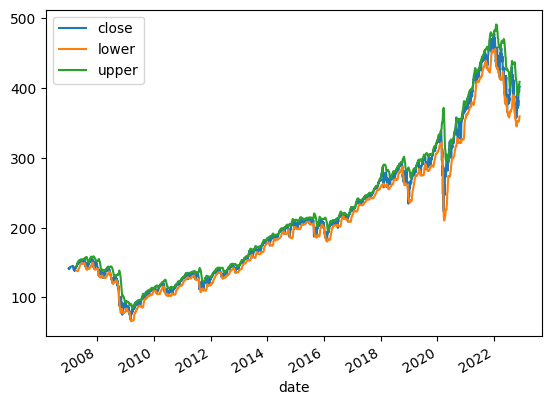

In [126]:
warnings.filterwarnings('ignore')
lower, upper = BollingerBands(df.close,30,2)
df['lower']=lower
df['upper']=upper
df.plot()
df.head(10).style


In [127]:
px.line(df)

In [135]:

mask_buy = df.close < df.lower
mask_sell = df.close > df.upper
df.loc[mask_buy, 'action']=1
df.loc[mask_sell, 'action']=-1


In [129]:
'''compra = df.lower[mask_buy]
venta = df.upper[mask_sell]
#buy = df.query(action=1).df.lower
#sell=df.query(action=-1).df.upper
'''

'compra = df.lower[mask_buy]\nventa = df.upper[mask_sell]\n#buy = df.query(action=1).df.lower\n#sell=df.query(action=-1).df.upper\n'

In [130]:
df['signalbuy']=np.where(df.close < df.lower, 1,0)
df['signalsell']=np.where(df.close > df.upper, 1,0)
df.head(15)

,close,lower,upper,signalbuy,signalsell
date,,,,,
2006-12-29,141.62,NaN,NaN,0,0
2007-01-03,141.37,NaN,NaN,0,0
2007-01-04,141.67,NaN,NaN,0,0
2007-01-05,140.54,NaN,NaN,0,0
2007-01-08,141.19,NaN,NaN,0,0
2007-01-09,141.07,NaN,NaN,0,0
2007-01-10,141.54,NaN,NaN,0,0
2007-01-11,142.16,NaN,NaN,0,0
2007-01-12,143.24,NaN,NaN,0,0


In [132]:
'''
checkbuy = False
df['operacion'] = 0
for signal in df: 
    if df.signalbuy ==1 and checkbuy ==False:
        checkbuy = True
        df.operacion = 1
    if df.close > df.upper and checkbuy==True:
        df.operacion = -1
        checkbuy = False
    '''

    

"\ncheckbuy = False\ndf['operacion'] = 0\nfor signal in df: \n    if df.signalbuy ==1 and checkbuy ==False:\n        checkbuy = True\n        df.operacion = 1\n    if df.close > df.upper and checkbuy==True:\n        df.operacion = -1\n"

In [133]:
signal_bought=False
list_actions=[]
for idx, data in df.iterrows():
    if data.close < data.lower and signal_bought==False:
        list_actions.append(idx)
        signal_bought=True
    elif data.close > data.upper and signal_bought==True:
        list_actions.append(idx)
        signal_bought=False

In [136]:
list_actions
df.loc[list_actions, 'action_clean']=True
df.action_clean=df.action_clean.fillna(False)
buys = df.query('action==1 & action_clean==True').lower
sells = df.query('action==-1 & action_clean==True').upper

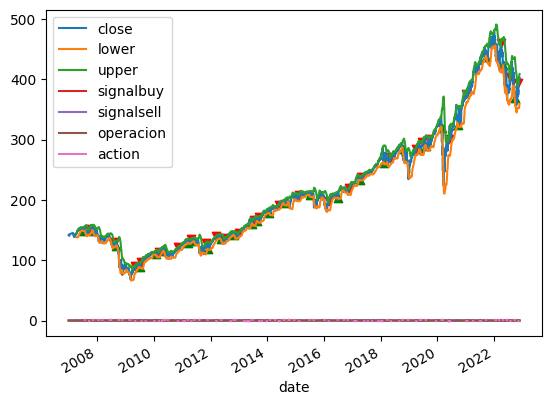

In [137]:
df.plot()
plt.scatter(x=buys.index, y=buys, marker = '^', c='green')
plt.scatter(x=sells.index, y=sells, marker = 'v', c='red')